In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
df = pd.read_csv('data/time_series_2019-ncov-Confirmed.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [4]:
df.shape

(487, 65)

In [5]:
# Describe dataset
df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,16.907598,20.383984,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,224.934544,266.700712,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [7]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [8]:
# Take all the columns of df that are dates and convert it into a list
dates = list(df.iloc[:, 4:].columns)

### Drop the column if the total no of negative cases is greater than 70%

In [9]:
# This function retuns a bool value. Returns if no of 0 confirmed cases is greater than or equal to 70% (threshold)
def percentage_of_neg_cases(col, threshold):
    col_bool = df[col] == 0
    zeros = col_bool.astype(int).sum()
    per_of_zeros = (zeros / 487) * 100
    return per_of_zeros > threshold

percentage_of_neg_cases('1/22/20', 70)

True

In [10]:
cols_to_drop = []
for date in dates:
    if percentage_of_neg_cases(date, 70):
        cols_to_drop.append(date)
        
cols_to_drop

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '02-01-2020',
 '02-02-2020',
 '02-03-2020',
 '02-04-2020',
 '02-05-2020',
 '02-06-2020',
 '02-07-2020',
 '02-08-2020',
 '02-09-2020',
 '02-10-2020',
 '02-11-2020',
 '02-12-2020',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '03-01-2020',
 '03-02-2020',
 '03-03-2020']

In [162]:
# Create a new df with unnecessary columns dropped
new_df = df.drop(cols_to_drop, axis=1)
new_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '03-04-2020',
       '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020',
       '03-10-2020', '03-11-2020', '03-12-2020', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [163]:
new_df.describe()

,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,195.318275,200.989733,209.002053,217.291581,225.451745,233.184805,243.515400,258.449692,263.537988,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,3068.479139,3079.154546,3092.273854,3105.489134,3118.029077,3132.790594,3145.105188,3170.345089,3177.926018,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,1.000000,2.000000,2.000000,3.000000,4.000000,5.000000,7.000000,9.000000,12.000000,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,67332.000000,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [13]:
new_df.head()

,Province/State,Country/Region,Lat,Long,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,43,47,48,50,50,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,331,360,420,461,502,511,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,50,50,83,93,99,117,...,197,238,428,566,673,790,900,1030,1183,1306


In [14]:
new_cols = []
for col in new_df.columns:
    col = col.replace('-', '/')
    new_cols.append(col)
new_df.columns = new_cols

In [15]:
new_df.head()

,Province/State,Country/Region,Lat,Long,03/04/2020,03/05/2020,03/06/2020,03/07/2020,03/08/2020,03/09/2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,43,47,48,50,50,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,331,360,420,461,502,511,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,50,50,83,93,99,117,...,197,238,428,566,673,790,900,1030,1183,1306


In [16]:
new_df.isna().sum()

Province/State    162
Country/Region      0
Lat                 0
Long                0
03/04/2020          0
03/05/2020          0
03/06/2020          0
03/07/2020          0
03/08/2020          0
03/09/2020          0
03/10/2020          0
03/11/2020          0
03/12/2020          0
3/13/20             0
3/14/20             0
3/15/20             0
3/16/20             0
3/17/20             0
3/18/20             0
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
dtype: int64

Now only 'Province/State' column has null values.

# Let's plot total confirmed cases country wise

In [18]:
data_1 = new_df.drop(["Province/State", "Lat", "Long"], axis=1)

In [19]:
data_1.columns

Index(['Country/Region', '03/04/2020', '03/05/2020', '03/06/2020',
       '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020',
       '03/12/2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [21]:
# Save all the country regions in a list
country_regions = list(new_df["Country/Region"].unique())
country_regions[:5]

['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia']

In [23]:
def cal_total(total):
    sum = 0
    for i in total:
        sum += i
    return sum

In [24]:
confirmed_case = {}
for cr in country_regions:
    total = new_df[new_df["Country/Region"] == cr].sum(axis=1)
    total = cal_total(total)
    confirmed_case[cr] = total
    

In [26]:
confirmed_case

{'Thailand': 2881,
 'Japan': 13329,
 'Singapore': 4388,
 'Nepal': 20,
 'Malaysia': 8230,
 'Canada': 7297,
 'Australia': 6761,
 'Cambodia': 335,
 'Sri Lanka': 460,
 'Germany': 135037,
 'Finland': 3816,
 'United Arab Emirates': 1616,
 'Philippines': 2161,
 'India': 2274,
 'Italy': 428621,
 'Sweden': 15440,
 'Spain': 156912,
 'Belgium': 17874,
 'Egypt': 2328,
 'Lebanon': 1687,
 'Iraq': 2113,
 'Oman': 497,
 'Afghanistan': 240,
 'Bahrain': 3443,
 'Kuwait': 1944,
 'Algeria': 977,
 'Croatia': 1134,
 'Switzerland': 39007,
 'Austria': 17643,
 'Israel': 5526,
 'Pakistan': 3333,
 'Brazil': 5585,
 'Georgia': 485,
 'Greece': 4516,
 'North Macedonia': 470,
 'Norway': 18293,
 'Romania': 2507,
 'Estonia': 2324,
 'San Marino': 1500,
 'Belarus': 542,
 'Iceland': 3409,
 'Lithuania': 407,
 'Mexico': 1106,
 'New Zealand': 284,
 'Nigeria': 104,
 'Ireland': 4171,
 'Luxembourg': 2894,
 'Monaco': 89,
 'Qatar': 4906,
 'Ecuador': 2267,
 'Azerbaijan': 405,
 'Armenia': 883,
 'Dominican Republic': 531,
 'Indonesia'

In [28]:
# Let's make a new dataframe using confirmed_case dict
conf_df = pd.DataFrame(data=confirmed_case.values(), columns=["Total Confirmed Cases"], index=confirmed_case.keys())
gt_100k = conf_df[conf_df["Total Confirmed Cases"] > 100000]
list(gt_100k.index)

['Germany', 'Italy', 'Spain', 'US', 'China', 'Iran', 'Korea, South', 'France']

### Top 10 countries with highest number of confirmed cases

In [43]:
top_10_countries = conf_df["Total Confirmed Cases"].sort_values(ascending=False)[:10]
top_10_countries.index

Index(['China', 'Italy', 'Iran', 'Spain', 'Korea, South', 'Germany', 'US',
       'France', 'Switzerland', 'United Kingdom'],
      dtype='object')

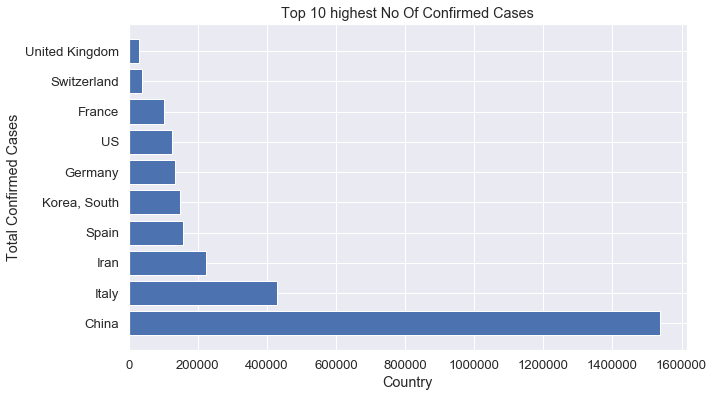

In [77]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
plt.barh(list(top_10_countries.index), top_10_countries)
plt.title("Top 10 highest No Of Confirmed Cases")
plt.xlabel("Country")
plt.ylabel("Total Confirmed Cases")
plt.show()

Here We can see that China has the highest among all the other countries followed by Italy, Iran, etc.

In [81]:
## Plot Date Wise
date_df = data_1.drop("Country/Region", axis=1)
date_df.head()
date_df.shape

(487, 19)

In [107]:
dates = list(date_df.sum(axis=0).index)
total_confirmed_cases = list(date_df.sum(axis=0).values)
dates = pd.to_datetime(dates)

In [124]:
dates

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22'],
              dtype='datetime64[ns]', freq=None)

In [159]:
d = ['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22']

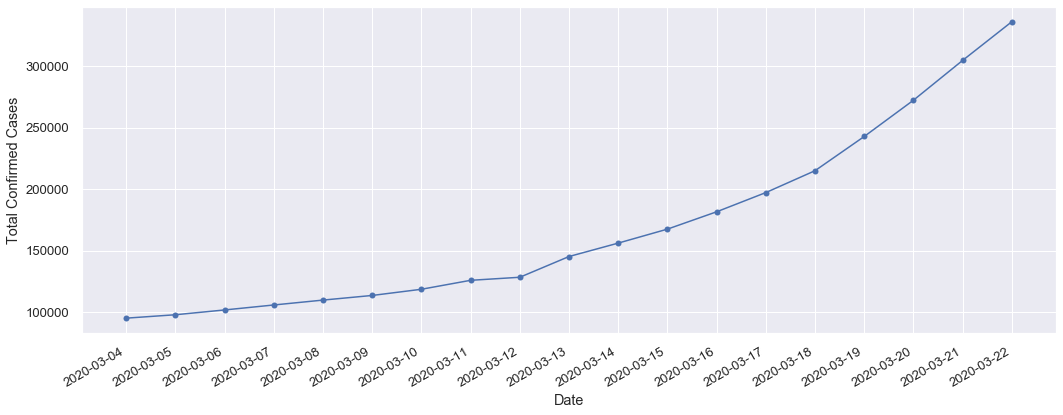

In [160]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 6))

plt.plot_date(d, total_confirmed_cases, linestyle="solid")
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()